In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree



from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import call

In [12]:
iris = load_iris()

X = iris.data[: ,]
y = iris.target #species of flower[setosa,versicolor,virginica]

r = 4 #for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,
                                                y, test_size=0.25,random_state=r) #25% test set
#for this example do not need development set - below example of development set from training set, could be from test set
#X_valid, X_test, y_valid, y_test = train_test_split(X_train, y_train, test_size=.25)
#print(X_train.shape)
#print(X_valid.shape)
#print(X_test.shape)

#X_train.shape


In [9]:
#training a model without pruning
unpruned = DecisionTreeClassifier(max_depth=None, random_state=r) #max_depth is the layers of decision tree
unpruned.fit(X_train, y_train)

print("Performance without pruning: ", unpruned.score(X_test,y_test))
print("At depth: ", unpruned.tree_.max_depth)

Performance without pruning:  0.9736842105263158
At depth:  4


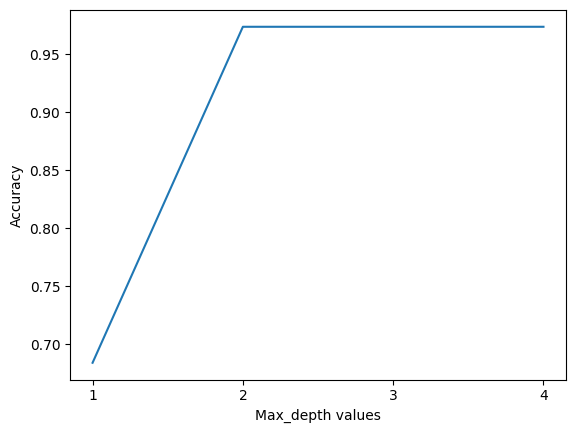

In [18]:
pruned_depth = range(1,unpruned.tree_.max_depth+1) #range(1,5)

pruned_scores = []

for d in pruned_depth:
    clf = DecisionTreeClassifier(max_depth=d, random_state=r)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    pruned_scores.append(score)

fig, ax = plt.subplots()
ax.plot(pruned_depth,pruned_scores)
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")
ax.xaxis.set_ticks(pruned_depth)
plt.show()




In [19]:
#fitting the chosen tree
best_depth = pruned_depth[np.argmax(pruned_scores)]
print(best_depth)
print('Best performance reached at depth of: ', best_depth)

pruned = DecisionTreeClassifier(max_depth=best_depth)
                             
pruned.fit(X,y)

2
Best performance reached at depth of:  2


DecisionTreeClassifier(max_depth=2)

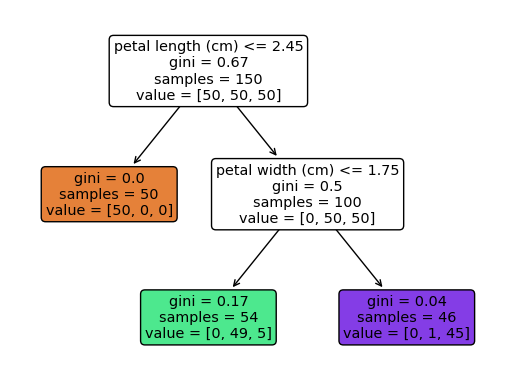

In [20]:
graphviz_installed = False

if (graphviz_installed):
  export_graphviz(pruned, out_file='pruned_tree.dot', feature_names = iris.feature_names,
                  rounded = True, proportion = False, precision = 2, filled = True)
  
  # Convert to png using system command
  call(['dot', '-Tpng', 'pruned_tree.dot', '-o', 'pruned_tree.png', '-Gdpi=600'])
  
else: 
  fig = plt.figure()
  tree.plot_tree(pruned,feature_names = iris.feature_names, 
                     rounded = True, proportion = False, precision = 2, filled = True) #display tree
  fig.savefig('pruned_tree.png')
  
#Image(filename = 'pruned_tree.png', width=400) #uncomment if using graphviz